In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import random as sparse_random
from sklearn.random_projection import sparse_random_matrix
from surprise import SVD
from surprise.model_selection import cross_validate

In [2]:
aisles=pd.read_csv("aisles.csv")
departments=pd.read_csv("departments.csv")
orders=pd.read_csv("orders.csv")
products=pd.read_csv("products.csv")
prior=pd.read_csv("order_products__prior.csv")

In [3]:
order_prior = pd.merge(prior,orders,on=['order_id','order_id'])
order_prior = order_prior.sort_values(by=['user_id','order_id'])


In [4]:
prior_product = pd.merge(prior,products, on = ['product_id','product_id'])
prior_product.head()
order_product = pd.merge(prior_product,orders,on=['order_id','order_id'])
order_product.head()
op_aisles = pd.merge(order_product,aisles,on=['aisle_id','aisle_id'])
op_aisles.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,aisle
0,2,33120,1,1,Organic Egg Whites,86,16,202279,prior,3,5,9,8.0,eggs
1,26,33120,5,0,Organic Egg Whites,86,16,153404,prior,2,0,16,7.0,eggs
2,120,33120,13,0,Organic Egg Whites,86,16,23750,prior,11,6,8,10.0,eggs
3,327,33120,5,1,Organic Egg Whites,86,16,58707,prior,21,6,9,8.0,eggs
4,390,33120,28,1,Organic Egg Whites,86,16,166654,prior,48,0,12,9.0,eggs


In [5]:
combined_table= op_aisles.dropna(how='any',axis=0) 
combined_table.isnull().sum()

order_id                  0
product_id                0
add_to_cart_order         0
reordered                 0
product_name              0
aisle_id                  0
department_id             0
user_id                   0
eval_set                  0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
aisle                     0
dtype: int64

In [148]:
random=combined_table.iloc[:1000000,:]

In [149]:
basket=random.groupby(['user_id', 'product_name'])['add_to_cart_order'].sum().unstack().reset_index().fillna(0).set_index('user_id')

In [150]:
basket

product_name,100% Baby Kale,100% Egg Whites,100% Liquid Egg Whites,100% Natural Broccoli Sprouts With Long Lasting Antioxidant Activity,Acorn Squash,All Natural 100% Egg Whites,All Whites 100% Egg Whites,All Whites 100% Liquid Egg Whites,Anaheim Pepper,Anaheim Peppers,...,Yellow Squash,Yellow Straightneck Squash,Yellow Sweet Corn,Yellow Tomato,Yellow Zucchini,Yucca Root,Yukon Gold Potatoes,Yukon Gold Potatoes 5lb Bag,Yukon Gold Potatoes Bag,Zucchini Squash
user_id,,,,,,,,,,,,,,,,,,,,,
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206204,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
206206,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
206207,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [151]:

normalised_basket = basket - np.asarray([(np.mean(basket, 1))]).T

In [152]:
normalised_basket

product_name,100% Baby Kale,100% Egg Whites,100% Liquid Egg Whites,100% Natural Broccoli Sprouts With Long Lasting Antioxidant Activity,Acorn Squash,All Natural 100% Egg Whites,All Whites 100% Egg Whites,All Whites 100% Liquid Egg Whites,Anaheim Pepper,Anaheim Peppers,...,Yellow Squash,Yellow Straightneck Squash,Yellow Sweet Corn,Yellow Tomato,Yellow Zucchini,Yucca Root,Yukon Gold Potatoes,Yukon Gold Potatoes 5lb Bag,Yukon Gold Potatoes Bag,Zucchini Squash
user_id,,,,,,,,,,,,,,,,,,,,,
3,-0.034646,-0.034646,-0.034646,-0.034646,-0.034646,-0.034646,-0.034646,-0.034646,-0.034646,-0.034646,...,-0.034646,-0.034646,-0.034646,-0.034646,-0.034646,-0.034646,-0.034646,-0.034646,-0.034646,-0.034646
5,-0.007874,-0.007874,-0.007874,-0.007874,-0.007874,-0.007874,-0.007874,-0.007874,-0.007874,-0.007874,...,-0.007874,-0.007874,-0.007874,-0.007874,-0.007874,-0.007874,-0.007874,-0.007874,-0.007874,-0.007874
7,-0.014173,-0.014173,-0.014173,-0.014173,-0.014173,-0.014173,-0.014173,-0.014173,-0.014173,-0.014173,...,-0.014173,-0.014173,-0.014173,-0.014173,-0.014173,-0.014173,-0.014173,-0.014173,-0.014173,-0.014173
8,-0.157480,-0.157480,-0.157480,-0.157480,-0.157480,-0.157480,-0.157480,-0.157480,-0.157480,-0.157480,...,-0.157480,-0.157480,-0.157480,-0.157480,-0.157480,-0.157480,-0.157480,-0.157480,-0.157480,-0.157480
10,-0.121260,-0.121260,-0.121260,-0.121260,-0.121260,-0.121260,-0.121260,-0.121260,-0.121260,-0.121260,...,-0.121260,-0.121260,-0.121260,-0.121260,-0.121260,-0.121260,-0.121260,-0.121260,-0.121260,-0.121260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206204,-0.072441,-0.072441,-0.072441,-0.072441,-0.072441,-0.072441,-0.072441,-0.072441,-0.072441,-0.072441,...,-0.072441,-0.072441,-0.072441,-0.072441,-0.072441,-0.072441,-0.072441,-0.072441,-0.072441,-0.072441
206206,-0.045669,-0.045669,-0.045669,-0.045669,-0.045669,-0.045669,-0.045669,-0.045669,-0.045669,-0.045669,...,-0.045669,-0.045669,-0.045669,-0.045669,-0.045669,-0.045669,-0.045669,-0.045669,-0.045669,-0.045669
206207,-0.078740,-0.078740,-0.078740,-0.078740,-0.078740,-0.078740,-0.078740,-0.078740,-0.078740,-0.078740,...,-0.078740,-0.078740,-0.078740,-0.078740,-0.078740,-0.078740,-0.078740,-0.078740,-0.078740,-0.078740


In [153]:
X = normalised_basket.T

In [154]:
X

user_id,3,5,7,8,10,11,12,14,16,17,...,206198,206199,206200,206201,206203,206204,206206,206207,206208,206209
product_name,,,,,,,,,,,,,,,,,,,,,
100% Baby Kale,-0.034646,-0.007874,-0.014173,-0.15748,-0.12126,-0.020472,-0.174803,-0.103937,-0.051969,-0.113386,...,-0.004724,-0.207874,-0.390551,-0.137008,-0.286614,-0.072441,-0.045669,-0.07874,-0.327559,-0.029921
100% Egg Whites,-0.034646,-0.007874,-0.014173,-0.15748,-0.12126,-0.020472,-0.174803,-0.103937,-0.051969,-0.113386,...,-0.004724,-0.207874,-0.390551,-0.137008,-0.286614,-0.072441,-0.045669,-0.07874,-0.327559,-0.029921
100% Liquid Egg Whites,-0.034646,-0.007874,-0.014173,-0.15748,-0.12126,-0.020472,-0.174803,-0.103937,-0.051969,-0.113386,...,-0.004724,-0.207874,-0.390551,-0.137008,-0.286614,-0.072441,-0.045669,-0.07874,-0.327559,-0.029921
100% Natural Broccoli Sprouts With Long Lasting Antioxidant Activity,-0.034646,-0.007874,-0.014173,-0.15748,-0.12126,-0.020472,-0.174803,-0.103937,-0.051969,-0.113386,...,-0.004724,-0.207874,-0.390551,-0.137008,-0.286614,-0.072441,-0.045669,-0.07874,-0.327559,-0.029921
Acorn Squash,-0.034646,-0.007874,-0.014173,-0.15748,-0.12126,-0.020472,-0.174803,-0.103937,-0.051969,-0.113386,...,-0.004724,-0.207874,-0.390551,-0.137008,-0.286614,-0.072441,-0.045669,-0.07874,-0.327559,-0.029921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yucca Root,-0.034646,-0.007874,-0.014173,-0.15748,-0.12126,-0.020472,-0.174803,-0.103937,-0.051969,-0.113386,...,-0.004724,-0.207874,-0.390551,-0.137008,-0.286614,-0.072441,-0.045669,-0.07874,-0.327559,-0.029921
Yukon Gold Potatoes,-0.034646,-0.007874,-0.014173,-0.15748,-0.12126,-0.020472,-0.174803,-0.103937,-0.051969,-0.113386,...,-0.004724,-0.207874,-0.390551,-0.137008,-0.286614,-0.072441,-0.045669,-0.07874,-0.327559,-0.029921
Yukon Gold Potatoes 5lb Bag,-0.034646,-0.007874,-0.014173,-0.15748,-0.12126,-0.020472,-0.174803,-0.103937,-0.051969,-0.113386,...,-0.004724,-0.207874,-0.390551,-0.137008,-0.286614,-0.072441,-0.045669,-0.07874,-0.327559,-0.029921


Number of components = 4 and explained variance = 0.2872283608637246
Number of components = 10 and explained variance = 0.4224403035932442
Number of components = 15 and explained variance = 0.48794587712605314
Number of components = 20 and explained variance = 0.5409238531451142
Number of components = 50 and explained variance = 0.7339795228046233
Number of components = 100 and explained variance = 0.8750598573047041
Number of components = 150 and explained variance = 0.9372287936284338
Number of components = 170 and explained variance = 0.9530126704902103


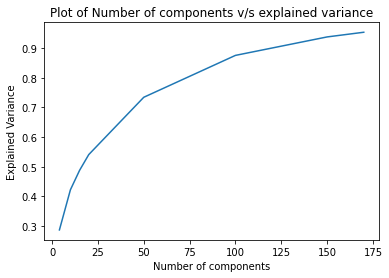

In [161]:
# Program to find the optimal number of components for Truncated SVD
n_comp = [4,10,15,20,50,100,150,170] # list containing different values of components
explained = [] # explained variance ratio for each component of Truncated SVD
for x in n_comp:
    svd = TruncatedSVD(n_components=x)
    svd.fit(X)
    explained.append(svd.explained_variance_ratio_.sum())
    print("Number of components = %r and explained variance = %r"%(x,svd.explained_variance_ratio_.sum()))
plt.plot(n_comp, explained)
plt.xlabel('Number of components')
plt.ylabel("Explained Variance")
plt.title("Plot of Number of components v/s explained variance")
plt.show()

In [166]:
SVD = TruncatedSVD(n_components=170, random_state=5)
resultant_matrix = SVD.fit_transform(X)
resultant_matrix.shape

(635, 170)

In [167]:
### correlation matrix
corr_mat = np.corrcoef(resultant_matrix)
corr_mat.shape

(635, 635)

In [230]:
# helper function to recommend 10 products
def product(product_name):
    col_idx = normalised_basket.columns.get_loc(product_name)
    corr_specific = corr_mat[col_idx]
    return pd.DataFrame({'corr_specific':corr_specific, 'Products': normalised_basket.columns})\
.sort_values('corr_specific', ascending=False)\
.head(10)

In [232]:
product("Eggplant")

,corr_specific,Products
144,1.000000,Eggplant
26,0.999778,Baby Fingerling Potatoes
257,0.999766,Lettuce
594,0.999756,Tuscan Kale
99,0.999751,Cauliflower head
201,0.999750,Green Chard
625,0.999749,Yellow Squash
173,0.999749,Fresh Wrap Organic Cucumber
286,0.999745,Opo Squash
122,0.999741,Cucumber
